## Домашнее задание <a class='anchor' id='hw'>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [6]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = 2 * reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
lambda_list = [10**x for x in range(3, -8, -1)]
display(lambda_list)

[1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

In [9]:
weights = np.zeros([len(lambda_list), X.shape[1] + 1])
for i, reg in enumerate(lambda_list):
    weights[i, 0] = reg    
    weights[i, 1:] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=reg)

Iter: 0, weights: [ -90.17986964   54.46556139 -241.7638103   167.38033323], error 3293.5071417235013
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan], error nan
Iter: 4000, weights: [nan nan nan nan], error nan
Iter: 4500, weights: [nan nan nan nan], error nan
Final MSE: nan
Iter: 0, weights: [ -3.65035294  -1.66374246 -17.19849214  -3.87086705], error 3235.6458754014448
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan

Iter: 3500, weights: [56.4999435   6.30307853 -0.35634861  6.57144483], error 24.904618880416876
Iter: 4000, weights: [56.4999435   6.30307853 -0.35634861  6.57144483], error 24.904618880416876
Iter: 4500, weights: [56.4999435   6.30307853 -0.35634861  6.57144483], error 24.904618880416876
Final MSE: 24.904618880416876
Iter: 0, weights: [12.42847256  1.13309942  2.23783864  3.82463938], error 3162.395567174166
Iter: 500, weights: [56.49999435  6.30306834 -0.35627064  6.57137902], error 24.904618879500067
Iter: 1000, weights: [56.49999435  6.303092   -0.35638482  6.57147326], error 24.9046188769435
Iter: 1500, weights: [56.49999435  6.303092   -0.35638483  6.57147327], error 24.904618876943466
Iter: 2000, weights: [56.49999435  6.303092   -0.35638483  6.57147327], error 24.904618876943477
Iter: 2500, weights: [56.49999435  6.303092   -0.35638483  6.57147327], error 24.904618876943477
Iter: 3000, weights: [56.49999435  6.303092   -0.35638483  6.57147327], error 24.904618876943477
Iter: 3

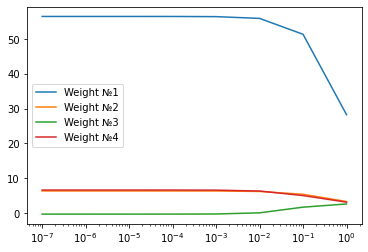

In [10]:
plt.figure()
for reg in range(X.shape[1]):
    plt.plot(weights[:, 0], weights[:, reg + 1], label=f'Weight №{reg+1}')
plt.xscale('log')
plt.legend()
plt.show()

Вывод: при увеличении $\lambda$ до некотрого предела (в данном случае до $10^-2$) веса начинают уменьшаться вплоть до околонулевых значений

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
weights = np.zeros([len(lambda_list), X.shape[1] + 1])
for i, reg in enumerate(lambda_list):
    weights[i, 0] = reg    
    weights[i, 1:] = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=reg)

Iter: 0, weights: [-87.79257916 -97.63669536 -98.01071175 -96.63150032], error 3173.431433754808
Iter: 500, weights: [110.0420702  -60.62914693 -68.44293515 -61.11249936], error 39014.157746198856
Iter: 1000, weights: [104.37471848 -60.62911737 -68.44307788 -61.11238155], error 39887.13550175373
Iter: 1500, weights: [ 82.75548737 -60.62911737 -68.44307789 -61.11238155], error 44139.023266869
Iter: 2000, weights: [  0.28466556 -60.62911737 -68.44307789 -61.11238155], error 38637.21669719663
Iter: 2500, weights: [ -1.57241225 -60.62911737 -68.44307789 -61.11238155], error 38388.506816213885
Iter: 3000, weights: [ -8.6566019  -60.62911737 -68.44307789 -61.11238155], error 37538.725217076935
Iter: 3500, weights: [-35.68064079 -60.62911737 -68.44307789 -61.11238155], error 35737.287697144064
Iter: 4000, weights: [111.23083195 -60.62911737 -68.44307789 -61.11238155], error 38843.78019252651
Iter: 4500, weights: [108.90948469 -60.62911737 -68.44307789 -61.11238155], error 39180.59202371352
Fi

Iter: 1000, weights: [56.499995    6.30307326 -0.35632931  6.57143301], error 24.90461887754933
Iter: 1500, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.904618877549265
Iter: 2000, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Iter: 2500, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Iter: 3000, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Iter: 3500, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Iter: 4000, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Iter: 4500, weights: [56.499995    6.30307326 -0.35632931  6.57143302], error 24.90461887754926
Final MSE: 24.90461887754926
Iter: 0, weights: [10.3725978   1.66956292  1.88701799  1.20429102], error 3568.521330551547
Iter: 500, weights: [56.4999995   6.30306104 -0.35623597  6.57135081], error 24.904618881178866
Iter: 1000, w

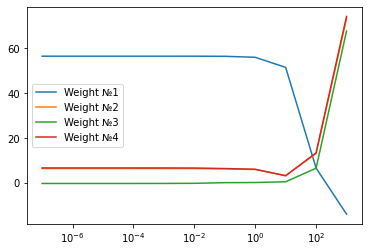

In [13]:
plt.figure()
for reg in range(X.shape[1]):
    plt.plot(weights[:, 0], weights[:, reg + 1], label=f'Weight №{reg+1}')
plt.xscale('log')
plt.legend()
plt.show()

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [14]:
display(min_max_scale(X[:, 1])),
display(standard_scale(X[:, 1])),
display(min_max_scale(standard_scale(X[:, 1]))),
display(standard_scale(min_max_scale(X[:, 1])))

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

array([-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
       -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339])

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

array([-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,  7.07106781e-01,
       -1.96261557e-16, -1.06066017e+00,  7.07106781e-01,  2.47487373e+00,
       -7.07106781e-01, -3.53553391e-01])

При стандартизации и нормализации происходит только масштабирование данных, следовательно, применение обоих методов возможно, но не имеет смысла, так как данные будут масштабированы тем методом, который был применён последним

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [15]:
# классический  GD
def gradient_descent_custom(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    results = np.zeros((iterations,2))
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        
        results[i, :] = [i, err]
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    
    print(f'Final MSE: {err}')
    return W, results

In [16]:
# стохастический градиентный спуск
def stohastic_gradient_descent_custom(X, y, iterations, batch_size=1, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    results = np.zeros((iterations, 2))        
    for i in range(0, iterations):
        
        inds = np.random.randint(n, size=batch_size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]

        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))
        results[i, :] = [i, err]
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {err}')
    return W, results

In [17]:
X, y = datasets.make_regression(100, 5, n_targets=1, noise=5)

In [18]:
display(X, y)

array([[-1.75422445, -1.01396113,  1.75882866,  0.89914999,  2.55810787],
       [-0.3645516 , -0.82880328, -0.71236189, -0.43160816, -1.12620529],
       [-1.47192102,  0.34999733,  0.06222801, -0.90818104, -1.01384678],
       [ 0.88506382,  1.31889478,  1.38817231,  1.03235869,  0.85656326],
       [ 0.1254651 , -0.18406145, -0.49385523, -0.84135772,  0.45554872],
       [-2.16700292,  0.94250961,  1.26405242,  0.94305847,  0.28331593],
       [-1.28836148, -0.38749578, -0.40385869,  1.47028272,  0.6295604 ],
       [ 0.36439523,  0.77848032,  1.01334815, -1.02853099, -1.4861046 ],
       [-0.92109169,  0.8194627 , -0.18384235, -0.51695933,  0.11872248],
       [-0.90658332, -0.11147069,  0.3968252 , -1.13656215,  1.21668789],
       [ 0.48699786,  1.18445341,  1.89402624, -0.31307309, -1.06213094],
       [-0.13356223,  0.34285625,  1.76985545,  0.8510602 ,  0.37816074],
       [-1.32118585,  0.82008416, -0.98675523,  0.35395986,  1.37436419],
       [ 0.4790324 , -1.29270462, -0.1

array([ 8.21515985e+01, -1.90962153e+02, -8.00096457e+01,  3.29190995e+02,
       -6.06106507e+01,  1.44097102e+02, -2.40644767e+01,  6.18695702e+01,
        1.98195091e+01, -1.51767743e+01,  2.09229840e+02,  1.86676420e+02,
        2.88996267e+01, -1.79205554e+02, -1.20237414e+02, -1.06940972e+02,
        7.29905656e+01,  3.93559524e+01,  1.07201309e+02, -9.62235405e+01,
        4.41896021e+01, -8.87528118e+01,  5.85469861e+01,  9.24970824e+01,
       -3.00232784e+01, -7.03308629e+01,  9.26088342e+00, -2.00306303e+02,
        1.88389198e+01, -6.85155978e+01, -9.48522178e+01,  1.76075388e+01,
        1.58035123e+02, -4.66567138e+01,  7.43336273e+01, -9.96327305e+01,
        2.18748911e+02,  9.51928465e+01,  7.93128729e+00,  3.28572591e+00,
       -4.29677181e+01, -1.74783220e+02,  1.29057282e+02, -1.28989276e+02,
       -9.66975113e+00, -6.99791138e+01,  2.72647204e+02,  1.41879192e+02,
       -6.25775915e+01, -8.51852626e+01, -2.05626252e+02,  9.73350483e+00,
        7.23243158e+00,  

In [19]:
ord_W, ord_results = gradient_descent_custom(X, y, iterations=2000, eta=1e-3)

Iter: 0, weights: [-0.22654933 -0.06648791  0.31724432  1.58515382 -2.03282008], error 16116.925678306196
Iter: 200, weights: [ 6.70914467 28.15606378 22.10398228 17.62902025  7.77467262], error 7617.089890066554
Iter: 400, weights: [12.74859348 48.130101   36.25271223 27.21545593 14.6717009 ], error 3682.4539920275042
Iter: 600, weights: [17.72698924 62.21657428 45.58488637 32.87338245 19.65920523], error 1819.899668157047
Iter: 800, weights: [21.70308746 72.12381571 51.83496125 36.14942428 23.34959505], error 920.7503422344682
Iter: 1000, weights: [24.81848707 79.07703587 56.08299378 37.99021343 26.12917799], error 478.91214123026555
Iter: 1200, weights: [27.23105609 83.94908806 59.01082334 38.97478194 28.25022798], error 258.1559373481
Iter: 1400, weights: [29.0862838  87.35862827 61.05509026 39.45643362 29.88356836], error 146.07866820773978
Iter: 1600, weights: [30.50733785 89.74241992 62.49952314 39.64969013 31.14896745], error 88.27658481401113
Iter: 1800, weights: [31.59381425 

In [20]:
st_W, st_results = stohastic_gradient_descent_custom(X, y, iterations=2000, batch_size=3, eta=1e-3)

Iter: 0, weights: [ 1.22098202 -0.25986851 -0.92957586  0.54359722 -0.01848123], error 16199.940328527453
Iter: 200, weights: [ 8.54308122 31.63225411 23.9719651  18.371189    9.4927171 ], error 6860.006931572896
Iter: 400, weights: [14.38927047 48.75177061 37.5646503  24.76694878 16.39926035], error 3546.537531391711
Iter: 600, weights: [19.89977387 62.1924196  46.54123625 30.64301885 21.30810107], error 1752.167336618869
Iter: 800, weights: [23.66669991 72.71514531 52.16131308 34.49499012 24.13558623], error 864.3178539315966
Iter: 1000, weights: [26.68353412 79.32716869 56.18046697 36.54369065 26.96804416], error 447.6326925472908
Iter: 1200, weights: [28.27844271 83.79279945 59.20344539 37.91364484 29.00529316], error 245.90699416896007
Iter: 1400, weights: [30.00683912 87.60521794 62.03385082 38.74775338 30.39131319], error 125.75091073572911
Iter: 1600, weights: [31.35240465 89.98978076 63.13241678 38.88296777 31.56083363], error 76.04367927339655
Iter: 1800, weights: [32.2071852

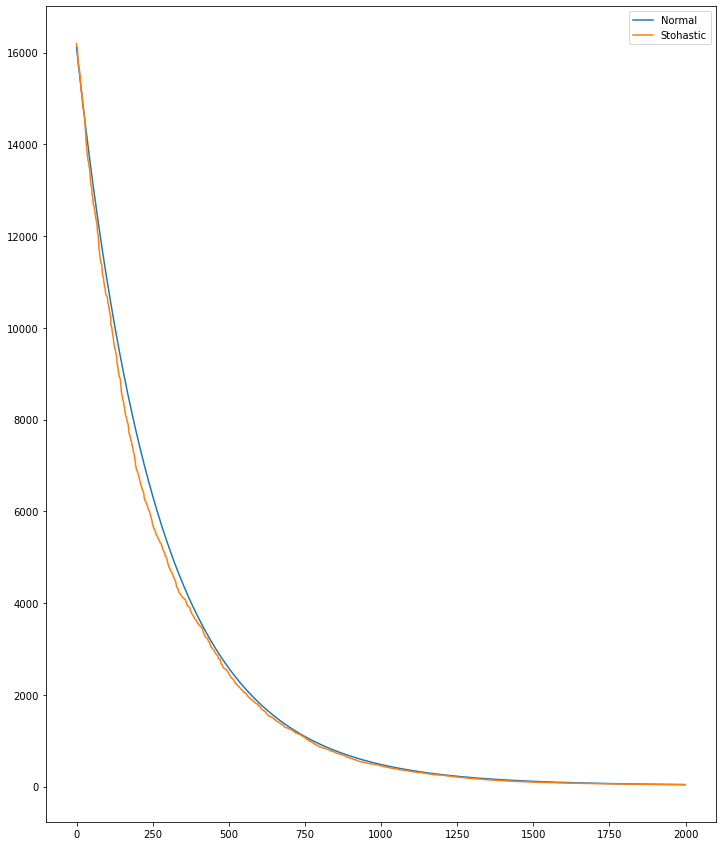

In [21]:
plt.figure(figsize=(12, 15))
plt.plot(ord_results[:, 0], ord_results[:, 1], label="Normal")
plt.plot(st_results[:, 0], st_results[:, 1], label="Stohastic")
plt.legend()
plt.show()

Кривая стохастического градиентного спуска более "неровная", конечная ошибка близка у обоих методов, но в обычном градиентном спуске меньше.